<a href="https://colab.research.google.com/github/jessepoljak/Project_2_Credit_Default/blob/Jesse/Project2_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libs
!pip install ucimlrepo


In [38]:
# Import depend
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [7]:
# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

In [61]:
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets
df = pd.concat([X, y], axis=1)

df = df.rename(columns={'X1' : 'LIMIT_BAL',	'X2' : 'SEX',	'X3' : 'EDUCATION',	'X4' : 'MARRIAGE',	'X5' : 'AGE',	'X6' : 'PAY_1',	'X7' : 'PAY_2',	'X8' : 'PAY_3',	'X9' : 'PAY_4',	'X10' : 'PAY_5',	'X11' : 'PAY_6',	'X12' : 'BILL_AMT1',	'X13' : 'BILL_AMT2',	'X14' : 'BILL_AMT3',	'X15' : 'BILL_AMT4',	'X16' : 'BILL_AMT5',	'X17' : 'BILL_AMT6',	'X18' : 'PAY_AMT1',	'X19' : 'PAY_AMT2',	'X20' : 'PAY_AMT3',	'X21' : 'PAY_AMT4',	'X22' : 'PAY_AMT5',	'X23' : 'PAY_AMT6',	'Y' : 'default payment next month'})

df = df.rename(columns={'default payment next month' : 'default_payment_next_month'})

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [75]:
#Create new column called Outstanding_AMT1 that is Bill_Amt1 - Pay_Amt1
#make this a function - fix
df['Outstanding_AMT1'] = df['BILL_AMT1'] - df['PAY_AMT1']
df['Outstanding_AMT2'] = df['BILL_AMT2'] - df['PAY_AMT2']
df['Outstanding_AMT3'] = df['BILL_AMT3'] - df['PAY_AMT3']
df['Outstanding_AMT4'] = df['BILL_AMT4'] - df['PAY_AMT4']
df['Outstanding_AMT5'] = df['BILL_AMT5'] - df['PAY_AMT5']
df['Outstanding_AMT6'] = df['BILL_AMT6'] - df['PAY_AMT6']

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,Outstanding_AMT6,Outstanding_AMT_Total,Credit_Utilization,Credit_Utilization1,Credit_Utilization2,Credit_Utilization3,Credit_Utilization4,Credit_Utilization5,Credit_Utilization6,Avg_Credit_Utilization
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,7015,35.075000,19.565000,12.065000,3.445000,0.000000,0.000000,0.000000,5.845833
1,120000,2,2,2,26,-1,2,0,0,0,...,1261,12077,10.064167,2.235000,0.604167,1.401667,1.893333,2.879167,1.050833,1.677361
2,90000,2,2,2,34,0,0,0,0,0,...,10549,90635,100.705556,30.801111,13.918889,13.954444,14.812222,15.497778,11.721111,16.784259
3,50000,2,2,1,37,0,0,0,0,0,...,28547,222946,445.892000,89.980000,92.428000,96.182000,54.428000,55.780000,57.094000,74.315333
4,50000,1,2,1,57,-1,0,-1,0,0,...,18452,50290,100.580000,13.234000,-62.022000,51.670000,23.880000,36.914000,36.904000,16.763333


In [77]:
#sum all of the outstanding_amt columns into one column called outstanding_amt_total
df['Outstanding_AMT_Total'] = df['Outstanding_AMT1'] + df['Outstanding_AMT2'] + df['Outstanding_AMT3'] + df['Outstanding_AMT4'] + df['Outstanding_AMT5'] + df['Outstanding_AMT6']

df.head()

# #remove outstanding_amt_total	column
# df = df.drop(columns=['Outstanding_AMT_Total'])

# df.head()

# df.corr()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,Outstanding_AMT6,Outstanding_AMT_Total,Credit_Utilization,Credit_Utilization1,Credit_Utilization2,Credit_Utilization3,Credit_Utilization4,Credit_Utilization5,Credit_Utilization6,Avg_Credit_Utilization
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,7015,35.075000,19.565000,12.065000,3.445000,0.000000,0.000000,0.000000,5.845833
1,120000,2,2,2,26,-1,2,0,0,0,...,1261,12077,10.064167,2.235000,0.604167,1.401667,1.893333,2.879167,1.050833,1.677361
2,90000,2,2,2,34,0,0,0,0,0,...,10549,90635,100.705556,30.801111,13.918889,13.954444,14.812222,15.497778,11.721111,16.784259
3,50000,2,2,1,37,0,0,0,0,0,...,28547,222946,445.892000,89.980000,92.428000,96.182000,54.428000,55.780000,57.094000,74.315333
4,50000,1,2,1,57,-1,0,-1,0,0,...,18452,50290,100.580000,13.234000,-62.022000,51.670000,23.880000,36.914000,36.904000,16.763333


In [78]:
#create column called credit_utilization that is the outstanding_amt_total divided by the LIMIT_BAL
df['Credit_Utilization'] = df['Outstanding_AMT_Total'] / df['LIMIT_BAL'] * 100

df['Credit_Utilization1'] = df['Outstanding_AMT1'] / df['LIMIT_BAL'] * 100
df['Credit_Utilization2'] = df['Outstanding_AMT2'] / df['LIMIT_BAL'] * 100
df['Credit_Utilization3'] = df['Outstanding_AMT3'] / df['LIMIT_BAL'] * 100
df['Credit_Utilization4'] = df['Outstanding_AMT4'] / df['LIMIT_BAL'] * 100
df['Credit_Utilization5'] = df['Outstanding_AMT5'] / df['LIMIT_BAL'] * 100
df['Credit_Utilization6'] = df['Outstanding_AMT6'] / df['LIMIT_BAL'] * 100

#divide Credit_Utilization by 6
df['Avg_Credit_Utilization'] = df['Credit_Utilization']/6

df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,Outstanding_AMT6,Outstanding_AMT_Total,Credit_Utilization,Credit_Utilization1,Credit_Utilization2,Credit_Utilization3,Credit_Utilization4,Credit_Utilization5,Credit_Utilization6,Avg_Credit_Utilization
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,7015,35.075000,19.565000,12.065000,3.445000,0.000000,0.000000,0.000000,5.845833
1,120000,2,2,2,26,-1,2,0,0,0,...,1261,12077,10.064167,2.235000,0.604167,1.401667,1.893333,2.879167,1.050833,1.677361
2,90000,2,2,2,34,0,0,0,0,0,...,10549,90635,100.705556,30.801111,13.918889,13.954444,14.812222,15.497778,11.721111,16.784259
3,50000,2,2,1,37,0,0,0,0,0,...,28547,222946,445.892000,89.980000,92.428000,96.182000,54.428000,55.780000,57.094000,74.315333
4,50000,1,2,1,57,-1,0,-1,0,0,...,18452,50290,100.580000,13.234000,-62.022000,51.670000,23.880000,36.914000,36.904000,16.763333


In [79]:
#filter to outstanding total and default
df_corr = df[['PAY_1','default_payment_next_month']]


#find correlation between the two columns
df_corr.corr()

,PAY_1,default_payment_next_month
PAY_1,1.000000,0.324794
default_payment_next_month,0.324794,1.000000


In [80]:
# Initialize the scaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_corr)


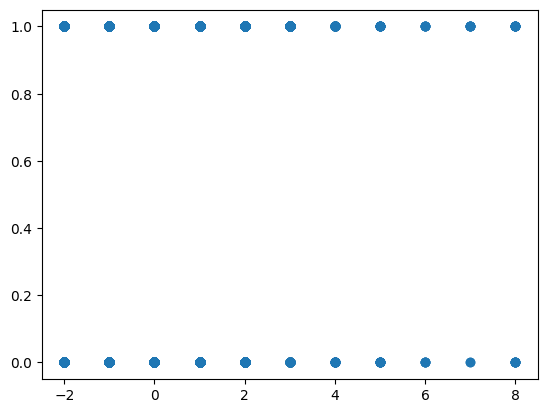

In [84]:
#scatter plot Avg_Credit_Utilization vs default_payment_next_month
import matplotlib.pyplot as plt

plt.scatter(df_corr['PAY_1'], df_corr['default_payment_next_month'])

#make a histogram

In [ ]:
#ideas
#compare monthly bills to limit amounts
#logistic regression model
#use VIF
#ensure we don't have coliniarity
#plot y vs pay 1
